# Mall Customer Segmentation Analysis


Dataset: Mall_Customers.csv

Project Overview:
This notebook performs customer segmentation analysis on mall customer data using various clustering
techniques. The analysis includes exploration of customer demographics, spending patterns, and 
income distribution to identify distinct customer segments for targeted marketing strategies.

Dataset Features:
- CustomerID: Unique identifier for each customer
- Gender: Customer's gender (Male/Female)
- Age: Customer's age
- Annual Income (k$): Customer's annual income in thousands of dollars
- Spending Score (1-100): Score assigned based on customer's spending behavior and purchasing power

Analysis Approach:
1. Exploratory Data Analysis (EDA)
2. Univariate Analysis
3. Bivariate Analysis
4. K-means Clustering:
   - Income-based clustering
   - Income-Spending based clustering
   - Multivariate clustering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

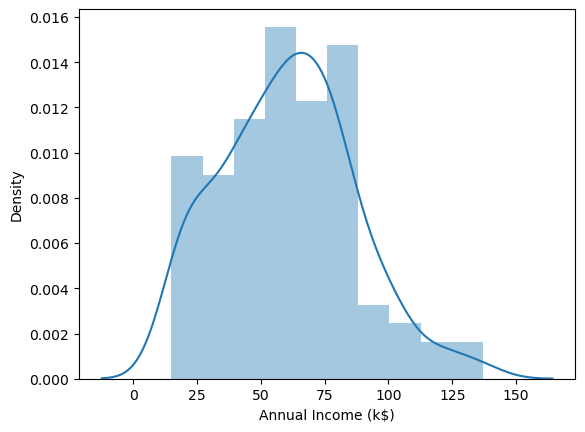

In [5]:
sns.distplot(df['Annual Income (k$)'])
# if you want to get rid of that first line of extra info, just add a semicolon at the end of the code

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

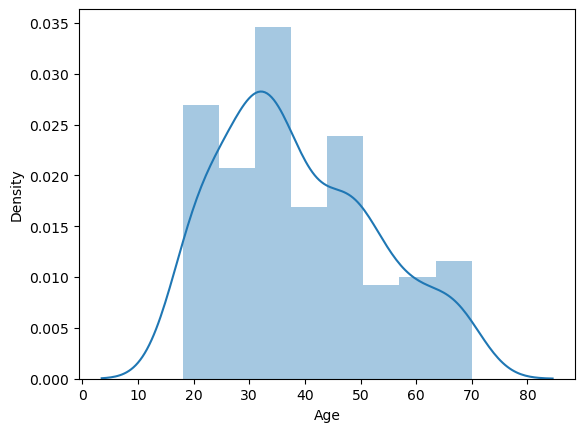

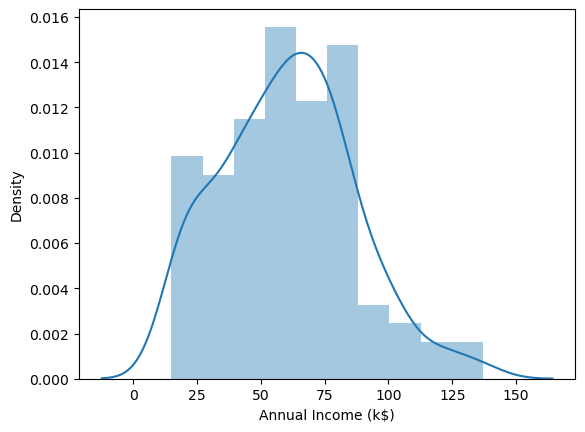

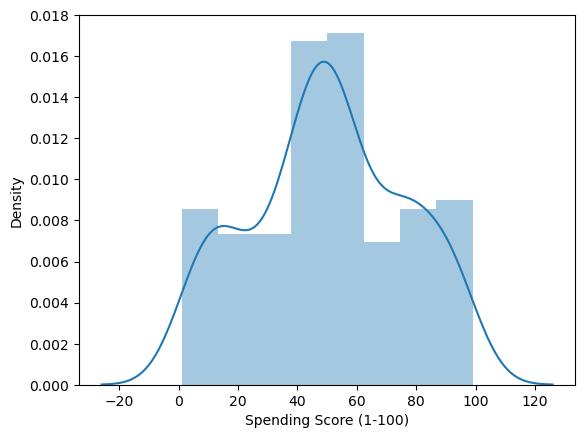

In [7]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure() #will create a new plot for each column
    sns.distplot(df[i])

In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

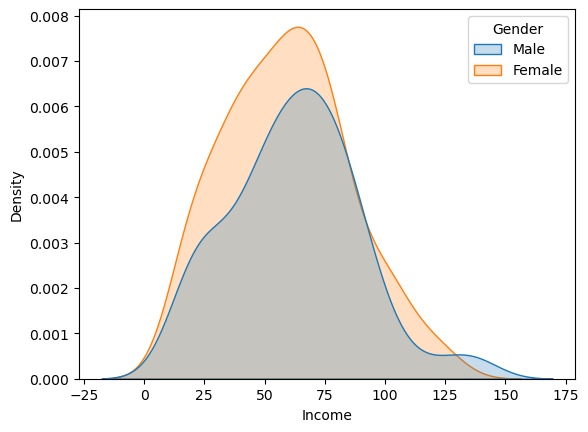

In [88]:
#sns.kdeplot(df['Annual Income (k$)'],shade=True, hue=df['Gender'])
# ^^ this code should work but if it doesnt, then the wide-form needs to be converted to long-form

df_new = pd.melt(df, id_vars = ['Gender'], value_vars = ['Annual Income (k$)'], 
                 var_name = 'Income type', value_name = 'Income')
sns.kdeplot(data = df_new, x = 'Income', hue='Gender', shade=True)
plt.savefig('income_distribution_by_gender.jpg')

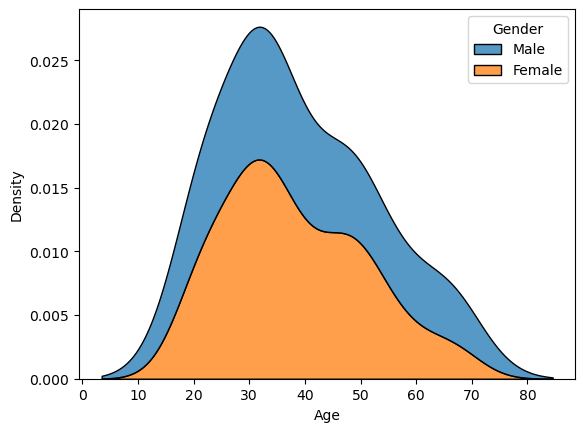

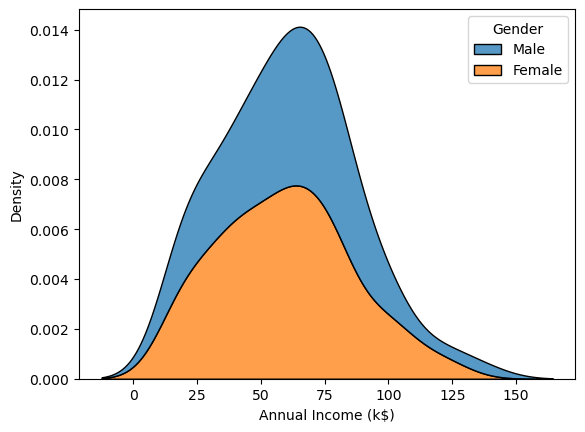

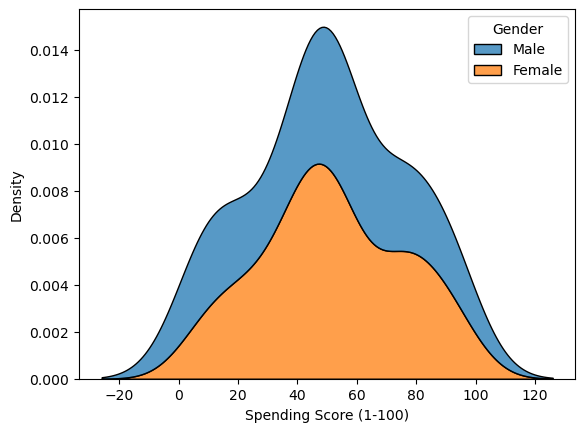

In [10]:
for i in columns:
    plt.figure()
    sns.kdeplot(df, x=i, hue='Gender', multiple = 'stack', shade = True)

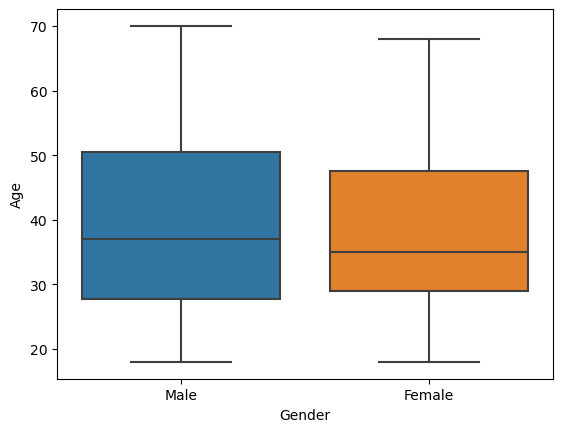

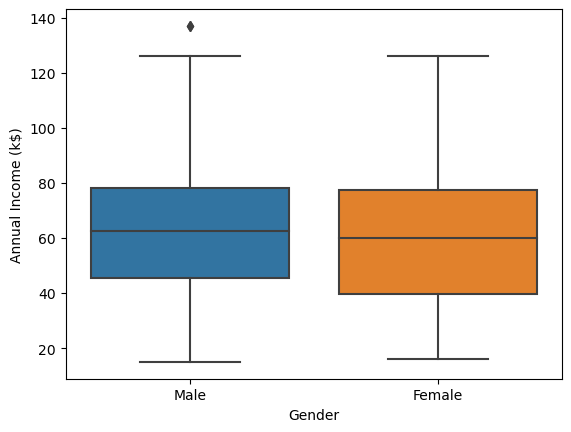

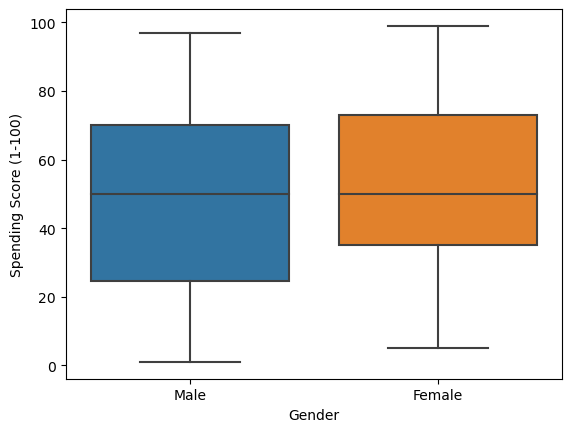

In [11]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x = 'Gender', y=df[i])

In [12]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

# Bivariate Analysis

In [13]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

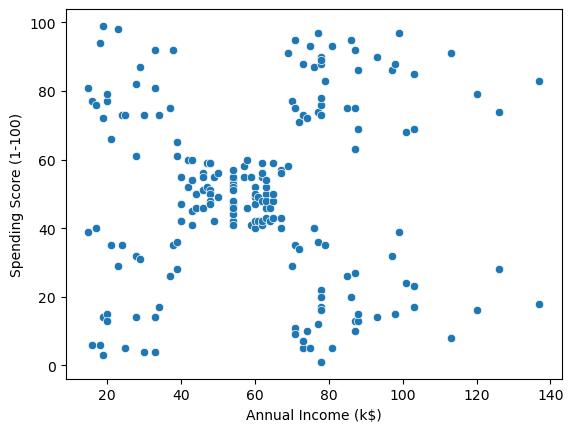

In [14]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)' )

In [15]:
# we can already see some clusters

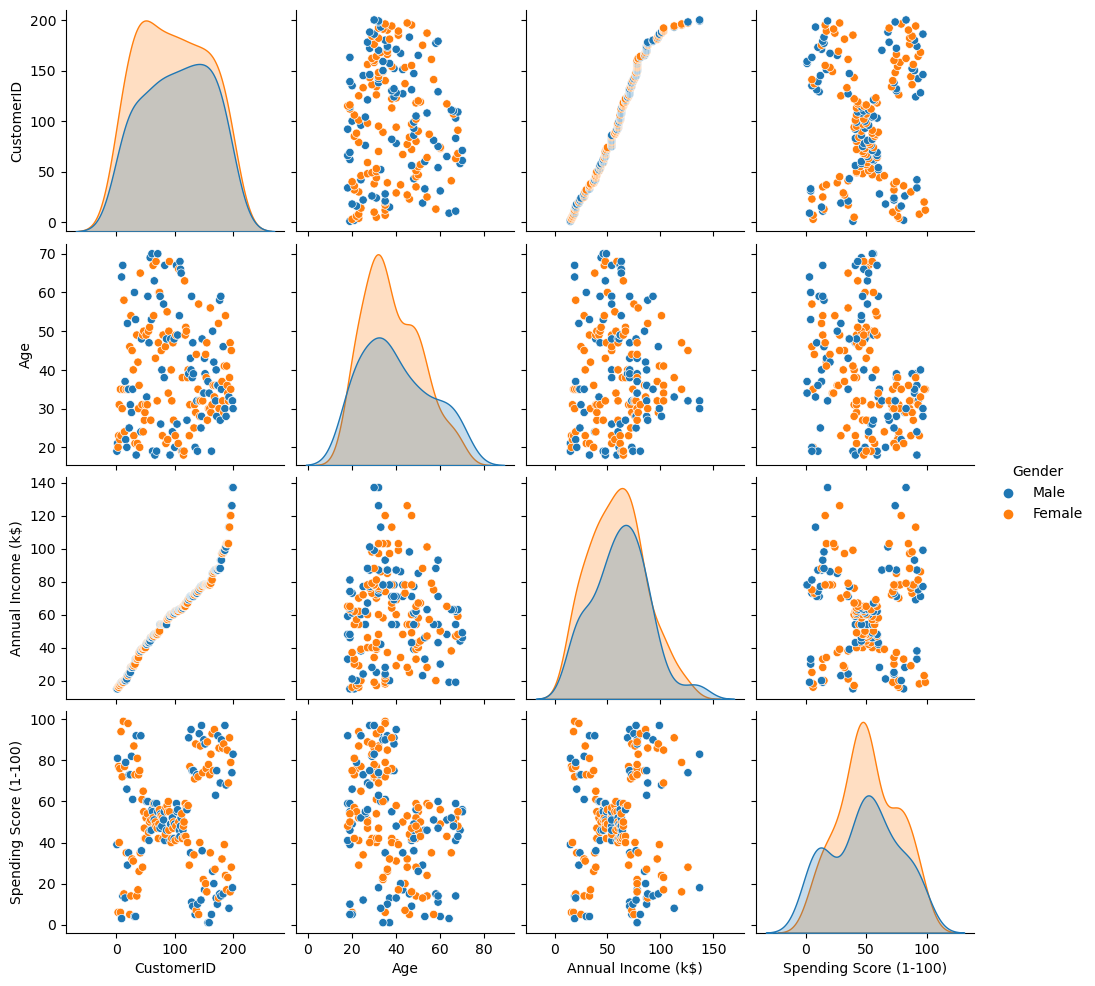

In [16]:
#df = df.drop('CustomerID', axis = 1) commenting this out cuz we ran it once and dont need to again
sns.pairplot(df, hue='Gender')

In [17]:
df.groupby(['Gender'])['Annual Income (k$)','Spending Score (1-100)','Age'].mean()

,Annual Income (k$),Spending Score (1-100),Age
Gender,,,
Female,59.250000,51.526786,38.098214
Male,62.227273,48.511364,39.806818


In [18]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
df.groupby(['Gender'])['Annual Income (k$)','Age','Spending Score (1-100)'].mean()

,Annual Income (k$),Age,Spending Score (1-100)
Gender,,,
Female,59.250000,38.098214,51.526786
Male,62.227273,39.806818,48.511364


In [22]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


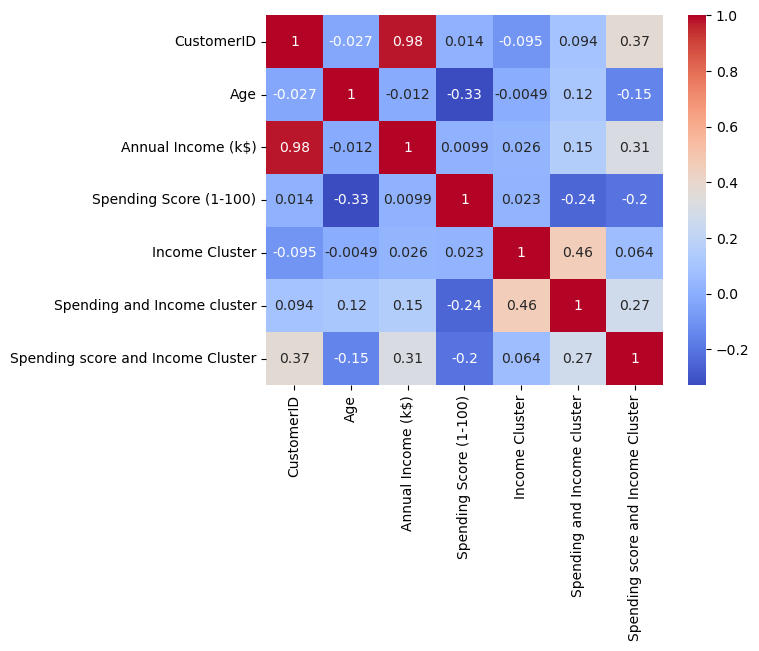

In [86]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.savefig('correlation_heatmap.jpg')

# Clustering - Univariate, Bivariate, Multivariate

In [24]:
clustering1 = KMeans()

In [25]:
clustering1.fit(df[['Annual Income (k$)']]) # need to use two brackets as it takes only a dataframe and not a series


KMeans()

In [26]:
clustering1.labels_

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [27]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,6
1,2,Male,21,15,81,6
2,3,Female,20,16,6,6
3,4,Female,23,16,77,6
4,5,Female,31,17,40,6


In [28]:
df['Income Cluster'].value_counts()

0    40
4    36
5    34
7    28
6    24
1    16
2    14
3     8
Name: Income Cluster, dtype: int64

In [29]:
clustering1.inertia_

3142.946872082166

In [30]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    kmeans.inertia_
    inertia_scores.append(kmeans.inertia_)

In [31]:
inertia_scores

[137277.28000000003,
 49761.73701298701,
 25341.285871863223,
 13278.112713472485,
 9407.908188585607,
 5081.484660267269,
 4181.740573839645,
 2916.7579365079364,
 2388.188727938728,
 2324.880647130647]

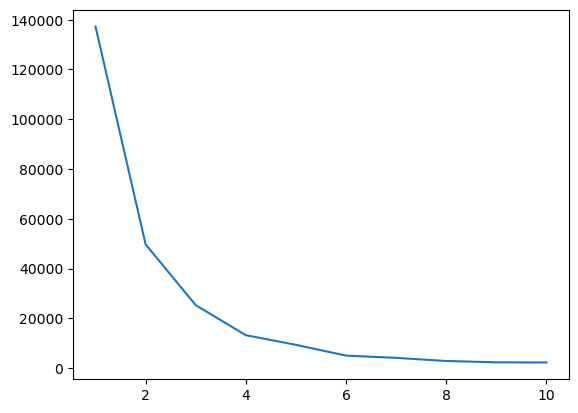

In [89]:
plt.plot(range(1,11), inertia_scores)
plt.savefig('elbow_curve.jpg')

In [33]:
# the elbow region falls around 3 so this is the approximate optimum number of clusters 

In [34]:
clustering1 = KMeans(n_clusters=3)

In [35]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [36]:
clustering1.inertia_

24361.259213759215

In [37]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [38]:
df.groupby(['Income Cluster'])['Age', 'Spending Score (1-100)'].mean()

,Age,Spending Score (1-100)
Income Cluster,,
0,38.663462,49.798077
1,39.500000,50.229730
2,37.545455,52.000000


In [39]:
#Bivariate clustering

In [40]:
clustering2 = KMeans()

In [41]:
clustering2.fit(df[['Spending Score (1-100)','Annual Income (k$)']])

KMeans()

In [42]:
clustering2.labels_

array([7, 0, 4, 0, 7, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 7, 0, 7, 0, 7, 0,
       4, 0, 4, 0, 7, 0, 7, 0, 4, 0, 4, 0, 4, 0, 4, 0, 7, 0, 7, 0, 7, 7,
       7, 0, 7, 7, 7, 7, 7, 1, 7, 1, 7, 7, 7, 7, 1, 7, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 6, 3, 6, 3, 6, 3, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5], dtype=int32)

In [43]:
df['Spending and Income cluster'] = clustering2.labels_

In [44]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster
0,1,Male,19,15,39,1,7
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,7


In [45]:
clustering2.inertia_

27298.924769965754

In [46]:
inertia_scores2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Spending Score (1-100)','Annual Income (k$)']])
    inertia_scores2.append(kmeans.inertia_)    

In [47]:
inertia_scores2

[269981.28,
 186648.03439866513,
 106348.37306211118,
 73679.78903948834,
 44454.47647967974,
 37239.83554245604,
 32278.29345308779,
 25343.889125729344,
 23158.969603487327,
 20122.08846476381]

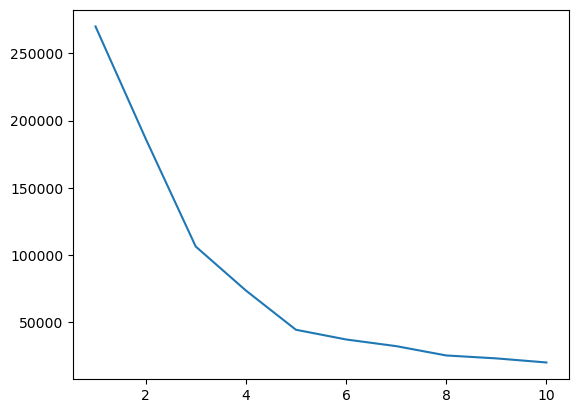

In [48]:
plt.plot(range(1,11), inertia_scores2)

In [49]:
# 5 looks like the optimum no. of clusters

In [50]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Spending Score (1-100)','Annual Income (k$)']])
df['Spending score and Income Cluster'] = clustering2.labels_

In [51]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster,Spending score and Income Cluster
0,1,Male,19,15,39,1,7,2
1,2,Male,21,15,81,1,0,2
2,3,Female,20,16,6,1,4,2
3,4,Female,23,16,77,1,0,2
4,5,Female,31,17,40,1,7,2


In [52]:
df.drop(['Spending and Income cluster'], axis = 1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending score and Income Cluster
0,1,Male,19,15,39,1,2
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,2
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1
196,197,Female,45,126,28,2,4
197,198,Male,32,126,74,2,1
198,199,Male,32,137,18,2,4


In [53]:
df['Spending score and Income Cluster'].value_counts()

0    76
2    48
4    35
3    30
1    11
Name: Spending score and Income Cluster, dtype: int64

In [54]:
clustering2.inertia_

74925.225293347

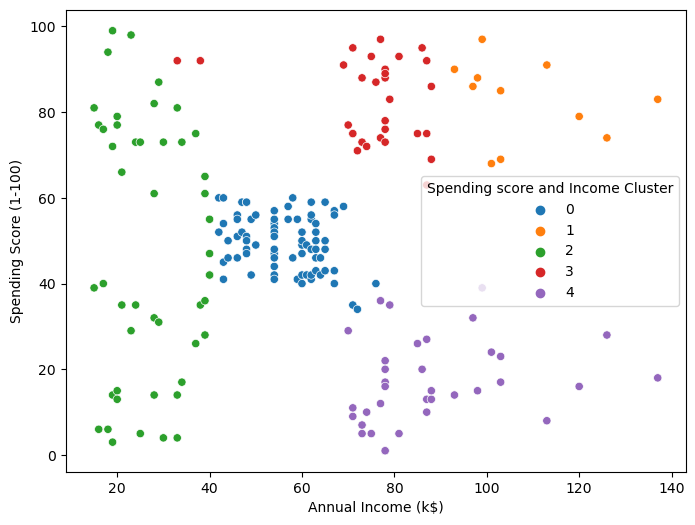

In [85]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                hue = 'Spending score and Income Cluster', palette = 'tab10')
plt.savefig('bivariate_clusters.jpg')

In [84]:
plt.savefig('bivariate_clusters.jpg')

<Figure size 640x480 with 0 Axes>

In [56]:
clustering2.cluster_centers_

array([[ 49.52631579,  56.31578947],
       [ 82.72727273, 108.18181818],
       [ 47.70833333,  27.0625    ],
       [ 82.56666667,  75.2       ],
       [ 17.11428571,  88.2       ]])

In [57]:
centers = clustering2.cluster_centers_
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

In [58]:
centers

,x,y
0,49.526316,56.315789
1,82.727273,108.181818
2,47.708333,27.062500
3,82.566667,75.200000
4,17.114286,88.200000


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

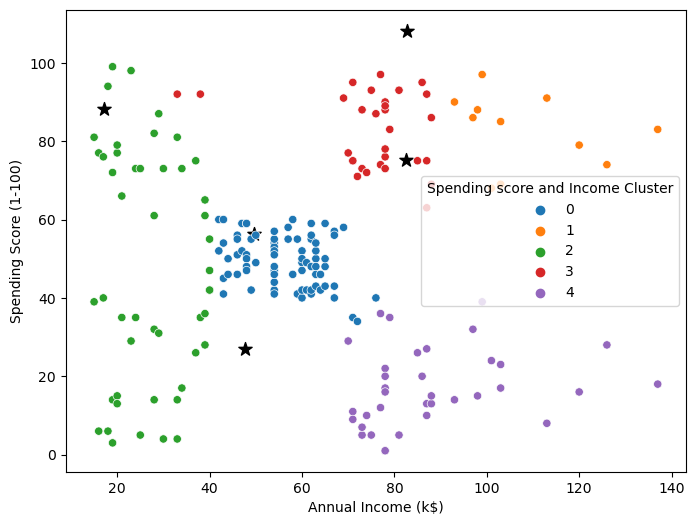

In [59]:
plt.figure(figsize = (8,6))
plt.scatter(x = centers['x'], y = centers ['y'], s = 100, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                hue = 'Spending score and Income Cluster', palette = 'tab10')



In [60]:
pd.crosstab(df['Spending score and Income Cluster'], df['Gender'], normalize = 'index')

Gender,Female,Male
Spending score and Income Cluster,,
0,0.565789,0.434211
1,0.545455,0.454545
2,0.666667,0.333333
3,0.500000,0.500000
4,0.457143,0.542857


In [61]:
# we are interested in high income and high spending score customers so this means the purple clustors (3)
# in cluster 3, the percentage of females is more than males

In [62]:
df.groupby('Spending score and Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)' ].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending score and Income Cluster,,,
0,43.315789,56.315789,49.526316
1,32.454545,108.181818,82.727273
2,35.875000,27.062500,47.708333
3,32.000000,75.200000,82.566667
4,41.114286,88.200000,17.114286


In [63]:
# multivariate analysis

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scale = StandardScaler()

In [66]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster,Spending score and Income Cluster
0,1,Male,19,15,39,1,7,2
1,2,Male,21,15,81,1,0,2


In [67]:
dff = pd.get_dummies(df, drop_first=True)
dff

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster,Spending score and Income Cluster,Gender_Male
0,1,19,15,39,1,7,2,1
1,2,21,15,81,1,0,2,1
2,3,20,16,6,1,4,2,0
3,4,23,16,77,1,0,2,0
4,5,31,17,40,1,7,2,0
...,...,...,...,...,...,...,...,...
195,196,35,120,79,2,5,1,0
196,197,45,126,28,2,6,4,0
197,198,32,126,74,2,5,1,1
198,199,32,137,18,2,6,4,1


In [68]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income cluster',
       'Spending score and Income Cluster', 'Gender_Male'],
      dtype='object')

In [69]:
dff = dff[['Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Gender_Male']]
dff.head(2)

,Annual Income (k$),Spending Score (1-100),Income Cluster,Gender_Male
0,15,39,1,1
1,15,81,1,1


In [70]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [71]:
dff

,0,1,2,3
0,-1.738999,-0.434801,0.603267,1.128152
1,-1.738999,1.195704,0.603267,1.128152
2,-1.700830,-1.715913,0.603267,-0.886405
3,-1.700830,1.040418,0.603267,-0.886405
4,-1.662660,-0.395980,0.603267,-0.886405
...,...,...,...,...
195,2.268791,1.118061,2.074651,-0.886405
196,2.497807,-0.861839,2.074651,-0.886405
197,2.497807,0.923953,2.074651,1.128152
198,2.917671,-1.250054,2.074651,1.128152


In [75]:
inertia_scores3 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dff)
    inertia_scores3.append(kmeans.inertia_)

In [76]:
inertia_scores3

[800.0,
 597.624825098909,
 491.94430442087844,
 368.57709355973645,
 255.515361468879,
 215.30833115924005,
 207.68701275276825,
 170.07452846929533,
 142.48419760634175,
 147.838890854162]

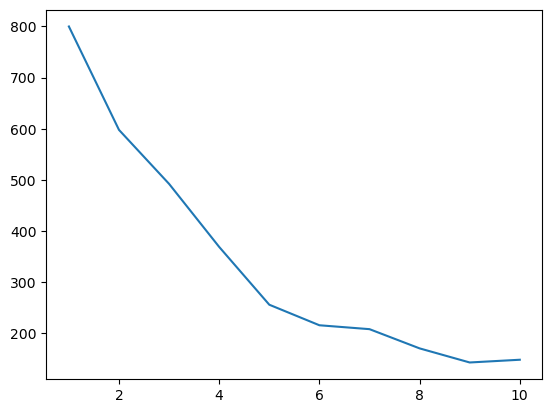

In [77]:
plt.plot(range(1,11), inertia_scores3)

In [78]:
df.to_csv('Clustering.csv')

# Conclusion and Key Findings

## Summary of Analysis

This analysis explored mall customer segmentation using various clustering techniques on customer data.
Key variables analyzed included age, annual income, gender, and spending patterns.

Key Findings:
1. Customer Demographics:
   - Gender split: 56% Female, 44% Male
   - Average age: 39 years
   - Average annual income: $60.56k
   - Average spending score: 50.2/100

2. Clustering Results:
   a) Income-Based Segmentation (3 clusters):
      - Lower income: ~ $33.5k (74 customers)
      - Middle income:~ $67.1k (90 customers)
      - High income: ~ $99.9k (36 customers)
      
   b) Income-Spending Based Segmentation (5 clusters):
      - Cluster 0: Moderate income, average spenders
      - Cluster 1: Low income, conservative spenders
      - Cluster 2: Low income, high spenders
      - Cluster 3: High income, conservative spenders
      - Cluster 4: High income, high spenders

3. Notable Correlations:
   - Negative correlation between age and spending (-0.327)
   - No significant correlation between income and spending (0.009)
   
4. Gender Insights:
   - Female customers: Higher average spending score (51.5)
   - Male customers: Lower average spending score (48.5)
   - High-income segments show more gender balance

Business Implications:
1. Target marketing strategies can be developed for each cluster
2. Product positioning can be adjusted based on spending patterns
3. Customer service approaches can be tailored to different segments
4. Inventory planning can be optimized for different customer groups

This segmentation provides valuable insights for retail strategy and customer relationship management
